In [2]:
!/opt/conda/envs/hunyuan_venv/bin/python -m pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 40.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 2.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 MB 42.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 42.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 117.1 MB/s eta 0:00:00
  Created wheel for jax: filename=jax-0.4.13-py3-none-any.whl size=1518704 sha256=8b66be0c60d7dc7c4e48d1bc50c232cf3dcb431667ad47d48d83f8df0ccb25dd
  Stored in directory: /tmp/pip-ephem-wheel-cache-hggaq3jy/wheels/46/d9/15/d2800d4089dc4c77299ac7513c6aa1036f5491edbd2bf6ba16
Successfully b

In [3]:
!/opt/conda/envs/hunyuan_venv/bin/python -m pip install open3d

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 42.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 44.6 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 44.3 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 83.9 MB/s eta 0:00:00


In [7]:
!/opt/conda/envs/hunyuan_venv/bin/python -m pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


# Loading 3D model by trimesh

In [331]:
import trimesh

mesh_path = '~/project_2_3d_human/Hunyuan3D-2/test3_mesh.glb'

mesh = trimesh.load(mesh_path, force='mesh')
true_height = 192
scale_factor = true_height / mesh.extents[1]
mesh.apply_scale(scale_factor)
print('\tWidth\tHeight\tThickness\n', mesh.extents)
mesh.show()

	Width	Height	Thickness
 [ 53.26195817 192.          38.34029857]


# OpenPose usage

In [289]:
import json
json_kp_path = '/root/project_2_3d_human_smpl/output_keypoints/input2_egor_keypoints.json'
kp = [[], []]
with open(json_kp_path, 'r') as file:
    data = json.load(file)
    input_kp = data['people'][0]['pose_keypoints_2d']
#     print("input_kp = ", input_kp)
    for i in range(1, len(input_kp) + 1):
        if(i % 3 != 0):
            if(i % 3 == 1):
                kp[0].append(input_kp[i - 1])
            else:
                kp[1].append(input_kp[i - 1])
            
print("kp = ", kp)
print(f'Min X: {min(kp[0])}. Max X: {max(kp[0])}.\nMin Y: {min(kp[1])}. Max Y: {max(kp[1])}')
print(f'Min X in mesh: {np.min(mesh.vertices[:, 0])}. Max X in mesh: {np.max(mesh.vertices[:, 0])}.\nMin Y in mesh: {np.min(mesh.vertices[:, 1])}. Max Y in mesh: {np.max(mesh.vertices[:, 1])}')

kp =  [[1556.14, 1588.97, 1288.72, 1211.13, 1188.89, 1900.1, 1999.88, 2010.9, 1632.69, 1433.15, 1389.28, 1455.11, 1821.7, 1822.31, 1822.59, 1477.83, 1644.08, 1422.03, 1744.41, 1900.01, 1966.29, 1799.99, 1388.85, 1333.48, 1466.9], [589.042, 1110.82, 1111.39, 1655.61, 2166.32, 1100, 1644, 2166.73, 2155.4, 2155.49, 2943.87, 3588.2, 2155.09, 2888.43, 3488.33, 566.591, 544.693, 667.528, 633.439, 3865.88, 3832.64, 3510.47, 3887.96, 3865.51, 3599.06]]
Min X: 1188.89. Max X: 2010.9.
Min Y: 544.693. Max Y: 3887.96
Min X in mesh: -26.85707424793464. Max X in mesh: 26.404883920098555.
Min Y in mesh: -96.24856106724876. Max Y in mesh: 95.75143893275123


In [290]:
def scale_skeleton(mesh, kp):
    kp = np.array(kp).T  # Преобразуем из [[x1,x2..], [y1,y2..]] в [[x1,y1], [x2,y2], ...]

    # Центрируем скелет
    kp_centered = kp - np.mean(kp, axis=0)

    # Размер скелета
    skel_size = np.max(kp_centered, axis=0) - np.min(kp_centered, axis=0)
    mesh_size = mesh.extents[:2]  # X и Y

    # Коэффициент масштабирования (по каждой оси)
    scale = mesh_size / skel_size

    # Применяем масштабирование
    kp_scaled = kp_centered * scale

    # Смещаем к центру 3D-модели (предполагаем, что mesh.center — это [x, y, z])
    kp_shifted = kp_scaled + mesh.centroid[:2]

    # Возвращаем результат в виде списка координат x и y
    return kp_shifted.T.tolist()
    

kp = scale_skeleton(mesh, kp)

print(f'kp = {kp}')

kp = [[-4.176197473782551, -2.0489848040382346, -21.5036178863024, -26.53104496657842, -27.9720809024637, 18.110615498659012, 24.57583877575584, 25.289877265569498, 0.7838430339520732, -12.145307624615757, -14.987854679799542, -10.722414227491637, 13.03070464553825, 13.070229462125026, 13.088372000886169, -9.250276796587249, 1.5218555928429518, -12.865825592558405, 8.022715999649169, 18.104783968342936, 22.399382072231255, 11.624009943736567, -15.015716435754163, -18.603403475770698, -9.958483756084815], [-97.18985555818416, -67.22474179371366, -67.19200734564235, -35.938075188862776, -6.6085840055381855, -67.84612201850575, -36.60482421010457, -6.5850381744693625, -7.235707115956831, -7.230538518892958, 38.045223183657285, 75.04835814117038, -7.2535100613991155, 34.8613673923011, 69.31293826594056, -98.47919081019964, -99.73676790470032, -92.68249434533458, -94.64018662656729, 90.99520294895872, 89.08626776669537, 70.58441314365747, 92.2632320952997, 90.9739542721405, 75.6720355202131

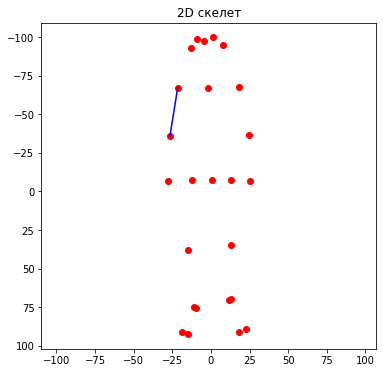

In [291]:
def draw_skeleton_2d(kp, connections=None):
    x, y = kp
    plt.figure(figsize=(6, 6))
    plt.scatter(x, y, c='r')

    if connections:
        for i, j in connections:
            plt.plot([x[i], x[j]], [y[i], y[j]], 'b-')

    plt.gca().invert_yaxis()  # Совместимость с OpenPose
    plt.axis('equal')
    plt.title("2D скелет")
    plt.show()

# connections — список ребер скелета, например:
connections = [
#     (1, 2), (2, 3), (3, 4), (5, 6), (6, 7), (8, 9), (9, 10), (10, 11), (12, 13), (13, 14), (15, 17), (0, 15), (0, 16),
#     (16, 18), (1, 5), (1, 8), (8, 12), (21, 19), (21, 20), (21, 14), (24, 22), (24, 23), (24, 11), (0, 1)
    (2, 3)
]

draw_skeleton_2d(kp, connections)

In [284]:
kp = np.array(kp)
z_cord = np.array([mesh.extents[2] / 2 for i in range(kp.shape[1])]).reshape(1, -1)
kp = np.concatenate((kp, z_cord), axis=0)
kp3d = kp.reshape(-1, 3)

In [303]:
mesh.visual.vertex_colors

TrackedArray([[102, 102, 102, 255],
              [102, 102, 102, 255],
              [102, 102, 102, 255],
              ...,
              [102, 102, 102, 255],
              [102, 102, 102, 255],
              [102, 102, 102, 255]], dtype=uint8)

In [336]:
def check_vertex(sphere_cords, r, vertex_cords, eps=0.1):
    if (vertex_cords[0] - sphere_cords[0]) ** 2 + (vertex_cords[1] - sphere_cords[1]) ** 2 + (vertex_cords[2] - sphere_cords[2]) ** 2 <= r + eps:
        return True
    return False

def get_bone_vertices(mesh, bone:list, num_steps, r=100, eps=0.1):
    vertex_idx = []
    
    x_space = np.linspace(bone[0][0], bone[1][0], num_steps)
    y_space = np.linspace(bone[0][1], bone[1][1], num_steps)
    z_space = np.linspace(bone[0][2], bone[1][2], num_steps)
    
    for step in range(num_steps):
        sphere_cords = [z_space[step], x_space[step], y_space[step]]
        for i, vertex in enumerate(mesh.vertices):
            if(check_vertex(sphere_cords, r, vertex, eps)):
                if(i not in vertex_idx):
                    vertex_idx.append(i)
                
    return vertex_idx


vertex_idx = get_bone_vertices(mesh, [kp3d[2], kp3d[3]], 10)
# print(vertex_idx)
mesh.visual.vertex_colors[vertex_idx] = [255, 255, 0, 255]

mesh.show()
